# Poverty in The United States, 2017

## Background

Poverty is a multidimensional issue that is difficult to describe based on income alone. The United States is still affected by poverty and will likely continue to be.

In The United States, poverty is defined by an income/economic threshold: an individual under age 65 that earns less than 13,064 per year, and an individual that is aged 65 or older that earns less 12,043-are considered to be living in poverty <sup>1</sup>. There are more thresholds considering the family size. 

The United Nations however, describes poverty in a way that describes the issue in a more comprehensive way, that looks beyond the economic impact. 
"Poverty is also social, political and cultural. Moreover, it is considered to undermine human rights - economic (the right to work and have an adequate income), social (access to health care and education), political (freedom of thought, expression and association) and cultural (the right to maintain one's cultural identity and be involved in a community's cultural life) <sup>2</sup> ." 

For the purposes of this project, poverty will be analyzed in economic terms as defined by The United States census. The United States census data for year 2017, regarding poverty was downloaded for use in this project. Variables and descriptions are included in the workbook. Overall counts and percentages are included per state, county, as well as The United States as a whole. 

## Purpose of Project

The purpose of this project is to visualize poverty by county and state in The United States, to better understand the magnitude of this particular issue. 

## Download

Please download the csv file "PovertyEstimates.xlsx" at:
https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/

Poverty estimates for the U.S., States, and counties, 2017 (see second tab in this workbook for variable name descriptions)																																			
Source: U.S. Census Bureau, Model-based Small Area Income & Poverty Estimates (SAIPE) -   https://www.census.gov/programs-surveys/saipe.html																										

## Data

In [1]:
#import in pandas,numpy and seaborn, matplotlib and offline plotly
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf

In [2]:
#Read in dataset, read in the FIPS codes as strings for leading zeros are usually dropped. 
pov=pd.read_excel("PovertyEstimates.xls", dtype={'FIPSTATE':'str', 'FIPSCOUNTY':str})
pov_states=pd.read_excel("Poverty States.xlsx")
pov_us=pd.read_excel("United States Poverty.xlsx")
#Change Columns of interest to strings (they are easier to work with as strings)
pov[['State', 'Area_Name']] = pov[['State', 'Area_Name']].astype(str)

In [4]:
pov.columns

Index(['FIPStxt', 'FIPSTATE', 'FIPSCOUNTY', 'State', 'Area_Name',
       'Rural-urban_Continuum_Code_2003', 'Urban_Influence_Code_2003',
       'Rural-urban_Continuum_Code_2013', 'Urban_Influence_Code_2013',
       'POVALL_2017', 'CI90LBAll_2017', 'CI90UBALL_2017', 'PCTPOVALL_2017',
       'CI90LBALLP_2017', 'CI90UBALLP_2017', 'POV017_2017', 'CI90LB017_2017',
       'CI90UB017_2017', 'PCTPOV017_2017', 'CI90LB017P_2017',
       'CI90UB017P_2017', 'POV517_2017', 'CI90LB517_2017', 'CI90UB517_2017',
       'PCTPOV517_2017', 'CI90LB517P_2017', 'CI90UB517P_2017', 'MEDHHINC_2017',
       'CI90LBINC_2017', 'CI90UBINC_2017', 'POV04_2017', 'CI90LB04_2017',
       'CI90UB04_2017', 'PCTPOV04_2017', 'CI90LB04P_2017', 'CI90UB04P_2017'],
      dtype='object')

In [3]:
#Viewing the first 10 rows for validation reasons. 
pov.head(5)

,FIPStxt,FIPSTATE,FIPSCOUNTY,State,Area_Name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2017,...,CI90UB517P_2017,MEDHHINC_2017,CI90LBINC_2017,CI90UBINC_2017,POV04_2017,CI90LB04_2017,CI90UB04_2017,PCTPOV04_2017,CI90LB04P_2017,CI90UB04P_2017
0,0,00,000,US,United States,NaN,NaN,NaN,NaN,42583651.0,...,17.5,60336.0,60250.0,60422.0,3932969.0,3880645.0,3985293.0,20.2,19.9,20.5
1,1000,01,000,AL,Alabama,NaN,NaN,NaN,NaN,802263.0,...,23.8,48193.0,47451.0,48935.0,78986.0,75009.0,82963.0,27.7,26.3,29.1
2,1001,01,001,AL,Autauga County,2.0,2.0,2.0,2.0,7390.0,...,22.1,58343.0,52121.0,64565.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,01,003,AL,Baldwin County,4.0,5.0,3.0,2.0,21199.0,...,17.9,56607.0,52439.0,60775.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,01,005,AL,Barbour County,6.0,6.0,6.0,6.0,7414.0,...,55.0,32490.0,29218.0,35762.0,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Values/NaN

In this dataset, we are depending upon heavily upon two columns: `'POVALL_2017'` which are the overall counts of poverty and  `'PCTPOVALL_2017'`, which are the overall percentages of poverty per that particular area. 

These two columns of interest have only one NaN or missing value and that is associated with The United States as it does not have an overall poverty percentage associated with it. NaN values will not be dropped given this information. For data pertaining to states and counties, there are no missing values. 

In [30]:
#Missing values in data
count_nan = len(pov) - pov.count()
count_nan

FIPStxt                               0
FIPSTATE                              0
FIPSCOUNTY                            0
State                                 0
Area_Name                             0
Rural-urban_Continuum_Code_2003      57
Urban_Influence_Code_2003            57
Rural-urban_Continuum_Code_2013      52
Urban_Influence_Code_2013            52
POVALL_2017                           1
CI90LBAll_2017                        1
CI90UBALL_2017                        1
PCTPOVALL_2017                        1
CI90LBALLP_2017                       1
CI90UBALLP_2017                       1
POV017_2017                           1
CI90LB017_2017                        1
CI90UB017_2017                        1
PCTPOV017_2017                        1
CI90LB017P_2017                       1
CI90UB017P_2017                       1
POV517_2017                           1
CI90LB517_2017                        1
CI90UB517_2017                        1
PCTPOV517_2017                        1


## Descriptive Statistics

In [25]:
#Descriptive Statistics
pov[['POVALL_2017', 'PCTPOVALL_2017']].describe()


,POVALL_2017,PCTPOVALL_2017
count,3.193000e+03,3193.000000
mean,4.000969e+04,15.340996
std,7.717069e+05,6.242822
min,1.300000e+01,3.000000
25%,1.661000e+03,10.900000
50%,3.966000e+03,14.300000
75%,1.007000e+04,18.400000
max,4.258365e+07,56.700000


## Poverty in The United States

First, we will look at poverty overall within the United States, and then take a look into state and county.

In [3]:
#Count of persons living in poverty UNited States as a whole, along with total percentage.
overall_count=pov_us['POVALL_2017'].max()
overall_pct_us=pov_us['PCTPOVALL_2017'].max()
print("Overall Estimated poverty count by persons in The United States: {}".format(overall_count))
print("Overall Estimated poverty percentage in The United States: {}".format(overall_pct_us))

Overall Estimated poverty count by persons in The United States: 42583651
Overall Estimated poverty percentage in The United States: 13.4


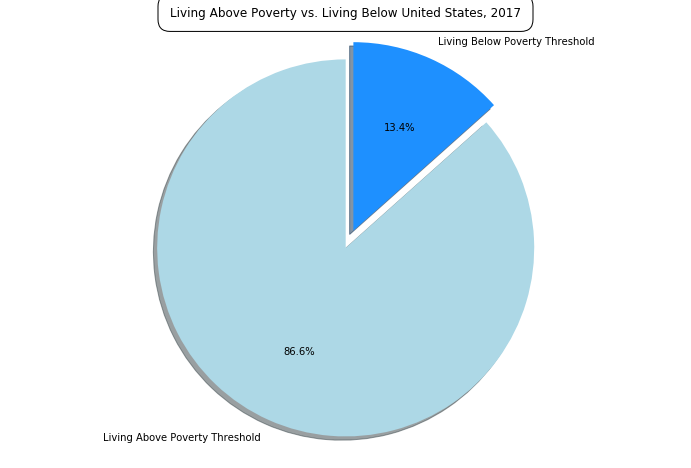

In [4]:
# Pie chart to show poverty 
labels = 'Living Above Poverty Threshold', 'Living Below Poverty Threshold'
sizes = [86.6, 13.4]
colors = ['lightblue', 'dodgerblue']
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors,labels=labels, autopct='%1.1f%%',textprops={'color':"black"},
        shadow=True, startangle=90)
ax1.axis('equal') 


fig = plt.gcf()
fig.set_size_inches(12,8)
plt.title("Living Above Poverty vs. Living Below "  +  "United States, 2017", color='black',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.show()

In the United States in 2017, the population was 324,459,463 <sup>3</sup>. There was an estimated 42,583,651 persons (13.4%) of the total population living in poverty. The pie chart above conveys the large percentage of our population that poverty applied to. In other words, nearly 1 out of 8 people in the United States live in poverty.

## Poverty by State
Here we will look into poverty in regards to state. 

In [6]:
#States included in output
overall_count_state=pov_states['POVALL_2017'].count()
#States with an overall percentage of poverty greater than or equal to 10%, and 20%
overall_pct_state_10=len(pov_states[pov_states['PCTPOVALL_2017'] >= 10.0])
overall_pct_state_20=len(pov_states[pov_states['PCTPOVALL_2017'] >= 20.0])
#10 States with the highest poverty counts and percentages
pct_state=pov_states.sort_values('PCTPOVALL_2017', ascending=False)[:10]
cnt_state=pov_states.sort_values('POVALL_2017', ascending=False)[:10]

print("Total States included: {}".format(overall_count_state))
print("States with overall poverty greater than or equal to 10%: {}".format(overall_pct_state_10))
print("States with overall poverty greater than or equal to 20%: {}".format(overall_pct_state_20))



Total States included: 51
States with overall poverty greater than or equal to 10%: 45
States with overall poverty greater than or equal to 20%: 0


In [7]:
#10 States with the highest count of persons living in poverty
print ("{}".format(cnt_state.State))

0    CA
1    TX
2    FL
3    NY
4    OH
5    IL
6    PA
7    GA
8    NC
9    MI
Name: State, dtype: object


In [8]:
#10 States with the highest percentage of population living in poverty
print("{}".format(pct_state.State))

24    MS
12    LA
31    NM
35    WV
20    KY
16    AL
44    DC
29    AR
23    OK
19    SC
Name: State, dtype: object


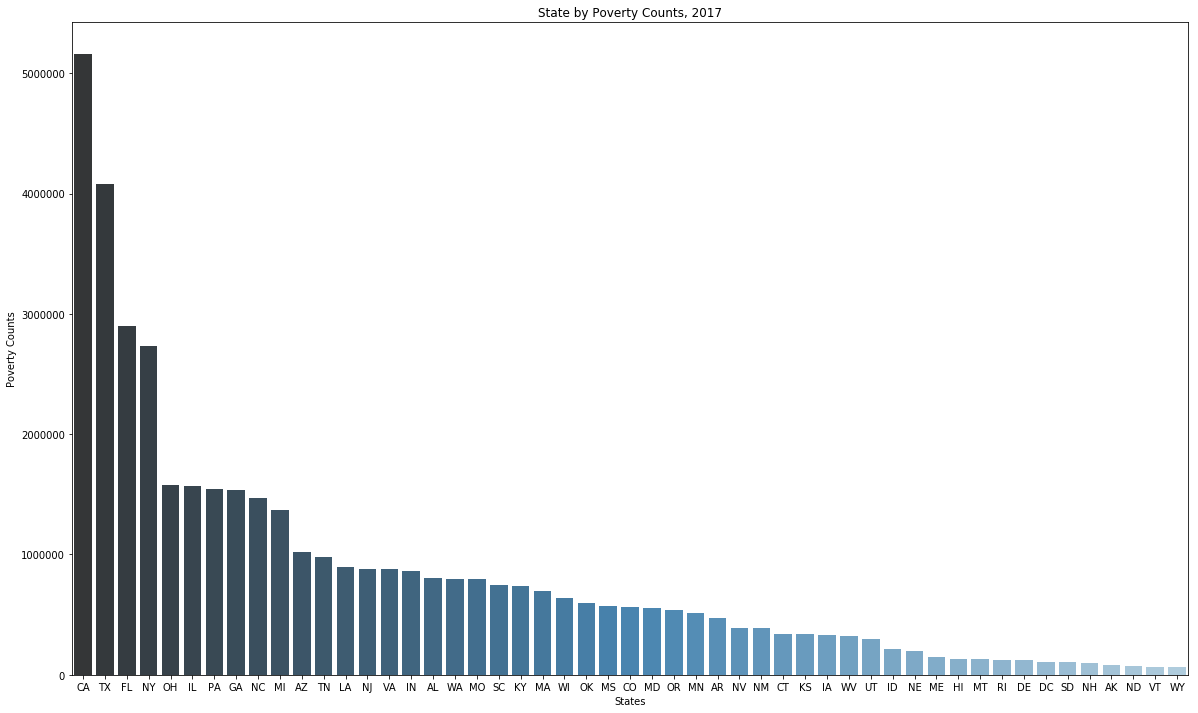

In [7]:
plt.figure(figsize=(20,12))
ax = sns.barplot(x="State", y="POVALL_2017", data=pov_states, 
                 plt.figure(figsize=(20,12)))
plt.xlabel("States")
plt.ylabel("Poverty Counts")
plt.title("State by Poverty Counts, 2017") 
plt.show()

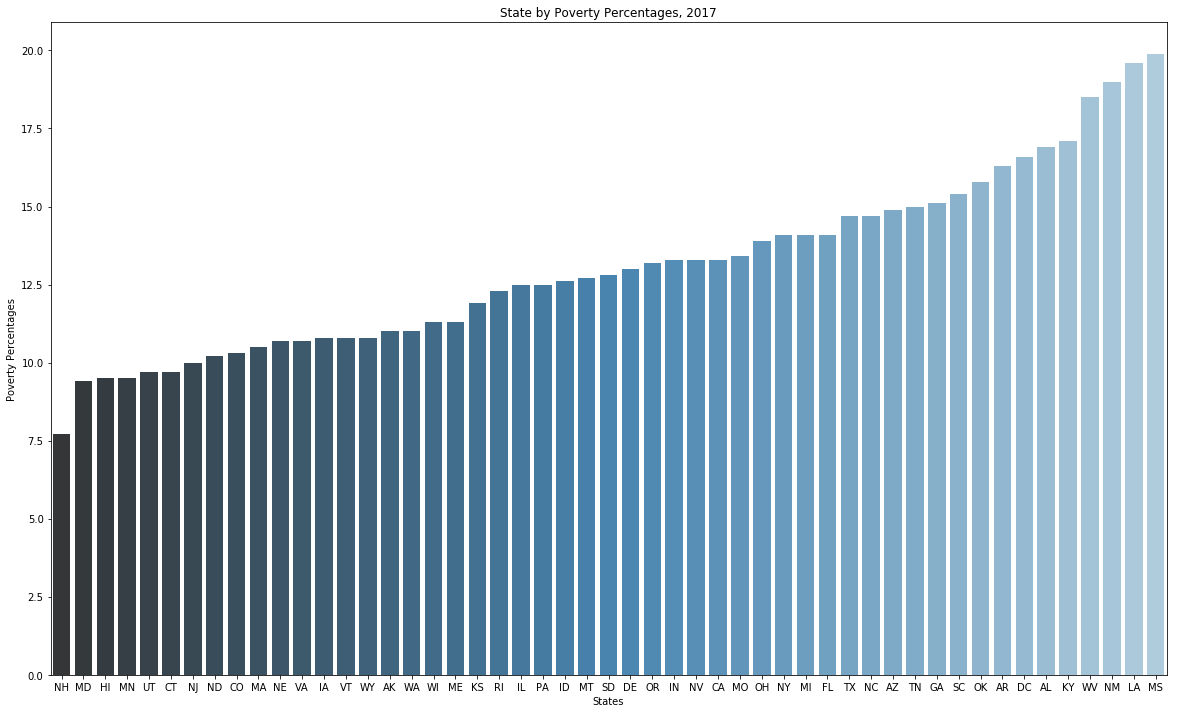

In [8]:
sorted_pov_states = pov_states.sort_values('PCTPOVALL_2017')
plt.figure(figsize=(20,12))
ax = sns.barplot(x="State", y="PCTPOVALL_2017",  data=sorted_pov_states,
                 palette="Blues_d")
plt.xlabel("States")
plt.ylabel("Poverty Percentages")
plt.title("State by Poverty Percentages, 2017") 
plt.show()

Many states have a poverty percentage greater than or equal to 10%. There are no states that have a poverty percentage equal to or greater than 20%. Provided above are visualizations for state by poverty counts (individuals living in poverty) and state by poverty percentages (percentage of state's population that is living in poverty), and the results are vastly different. 

The 10 states with the highest poverty counts overall are: California, Texas, Florida, New York, Ohio, Illinois, Pennsylvania, Georgia, North Carolina, and Michigan. The 10 states with the highest percentage of poverty are: Mississippi, Louisiana, New Mexico, West Virginia, Kentucky, Alabama, District of Columbia, Arkansas, Oklahoma, and South Carolina. 


A likely explanation for the vast differences is population density. New Mexico, for instance, is a state that has roughly over 2 million residents total. A large portion of the state is still very rural, with few industries and opportunities to earn higher wages in those areas. The state of California is home to nearly 40 million residents, and thus greater opportunities for individuals to live at or below the poverty threshold, but the overall percentage of those living in poverty is lower than New Mexico. 

## Poverty by County
This section will focus on poverty by county, and focus on the counties which are the most impoverished. 

In [11]:
#Extracting the states (and overall United States) from the dataset to focus on counties
extract_states=sum(pov['FIPSCOUNTY'].apply(lambda x: x[:]) == '000')
print(extract_states)
counties_only=pov[pov['FIPSCOUNTY']!='000']

52


In [12]:
# Total number of counties
sum_counties=len(counties_only)

# Number of counties where poverty level is higher than 10%, 20%, 30%, 40%, 50%
n_greater_10 = len(counties_only[counties_only['PCTPOVALL_2017'] >= 10.0])
n_greater_20 = len(counties_only[counties_only['PCTPOVALL_2017'] >= 20.0])
n_greater_30 = len(counties_only[counties_only['PCTPOVALL_2017'] >= 30.0])
n_greater_40 = len(counties_only[counties_only['PCTPOVALL_2017'] >= 40.0])
n_greater_50 = len(counties_only[counties_only['PCTPOVALL_2017'] >= 50.0])


print("Total counties: {}".format(sum_counties))
print("Counties with poverty equal to or greater than 10%: {}".format(n_greater_10))
print("Counties with poverty equal to or greater than 20%: {}".format(n_greater_20))
print("Counties with poverty equal to or greater than 30%: {}".format(n_greater_30))
print("Counties with poverty equal to or greater than 40%: {}".format(n_greater_40))
print("Counties with poverty equal to or greater than 50%: {}".format(n_greater_50))


Total counties: 3142
Counties with poverty equal to or greater than 10%: 2588
Counties with poverty equal to or greater than 20%: 616
Counties with poverty equal to or greater than 30%: 88
Counties with poverty equal to or greater than 40%: 13
Counties with poverty equal to or greater than 50%: 2


In [13]:
#The counties that have the highest count of individuals living in poverty.
pct_county=counties_only.sort_values('PCTPOVALL_2017',ascending=False)[:10]
cnt_county=counties_only.sort_values('POVALL_2017',ascending=False)[:10]

print (cnt_county[['Area_Name', 'State', 'POVALL_2017']])

                Area_Name State  POVALL_2017
210    Los Angeles County    CA    1490853.0
625           Cook County    IL     746194.0
2668        Harris County    TX     733605.0
107       Maricopa County    AZ     570402.0
1885         Kings County    NY     518422.0
373     Miami-Dade County    FL     452649.0
1864         Bronx County    NY     400473.0
1336         Wayne County    MI     392205.0
2334  Philadelphia County    PA     388221.0
228      San Diego County    CA     385479.0


In [14]:
#The counties that have the highest percentage of population living in poverty.
print (pct_county[['Area_Name', 'State', 'PCTPOVALL_2017']])

                 Area_Name State  PCTPOVALL_2017
2470        Ziebach County    SD            56.7
2464           Todd County    SD            50.4
264         Crowley County    CO            47.4
1150   East Carroll Parish    LA            46.7
2412        Buffalo County    SD            43.3
1437      Claiborne County    MS            42.6
2419         Corson County    SD            42.4
1468        Leflore County    MS            42.2
1037           Clay County    KY            41.7
2455  Oglala Lakota County    SD            41.5


Included in the dataset are a total of 3,142 counties. Similar to the visualizations of counts of poverty by individuals in the United States, the counties that are located in highly populated states such as California and Texas, have the highest number of individuals living in poverty. 

The vast majority of counties (over 80%), has 10% of residents that were living in poverty for year 2017. There are less counties that have 20% or greater of people that live in poverty. There are two counties with a 50% or more percentage of residents living in poverty: Ziebach County and Todd County, both located in South Dakota. Out of the 10 counties with the highest percentage of poverty in the United States, 5 are located in South Dakota. Below is an interavctive map of the poverty in The United States for the year of 2017. 

In [16]:
#import plotly in order to visualize data in map form
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')


pov['FIPSTATE'] = pov['FIPSTATE'].apply(lambda x: str(x).zfill(2))
pov['FIPSCOUNTY'] = pov['FIPSCOUNTY'].apply(lambda x: str(x).zfill(3))
pov['FIPStxt'] = pov['FIPSTATE'] + pov['FIPSCOUNTY']

colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#1f77b4","#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b" 
]
endpts = list(np.linspace(1, 50, len(colorscale) - 1))
fips = pov['FIPStxt'].tolist()
values = pov['PCTPOVALL_2017'].tolist()

fig = ff.create_choropleth(
    fips = fips, values = values, scope = ['usa'],
    binning_endpoints = endpts, colorscale = colorscale,
    state_outline={'color': 'rgb(15, 15, 55)','width': .5},
    show_state_data = True,
    show_hover = True, centroid_marker = {
        'opacity': 0
    },
    asp = 3.0,
    title = 'USA by County Poverty Percentages, 2017 ',
    legend_title = '% Poverty'
)
py.iplot(fig, filename = 'choropleth_full_usa')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~abaltes/0 or inside your plot.ly account where it is named 'choropleth_full_usa'


## Conclusion

In conclusion, poverty is an issue that warrants concern. It affects a large portion of the population of The United States and can have lasting effects for the area. Special care should be made to the multifaceted issues that can cause poverty and address them respectfully. 

## References

1.https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-poverty-thresholds.html

2.http://www.unesco.org/new/en/social-and-human-sciences/themes/international-migration/glossary/poverty

3.http://www.worldometers.info/world-population/us-population/
